# Linear Regression

## Let's create a line with a random slope
But we won't *print* the slope at any time.
Our goal is to *deduce* the slope by other means.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

a = np.random.randn() # Unknown slope if you don't print it. Don't print the slope
x = np.linspace(-1, 1, 11)
y = a*x

def init_plot():
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    return fig, ax

def scatter(x, y, label):
    fig, ax = init_plot()
    ax.scatter(x, y, label=label)
    plt.legend()
    plt.show()

scatter(x, y, label='$y = ax$')

<Figure size 500x500 with 1 Axes>

## OBS. The slope can be deduced from the y axis range. Don't deduce the slope. Don't look at it

Let's make the problem a little bit harder. Instead of having

$x_1=0.0$

$x_2=0.1$

$x_3=0.2$

$\vdots$

$x_{11}=1.0$
    
as before, let's randomly sample 11 points $x_i \in \{-1, 1\}$

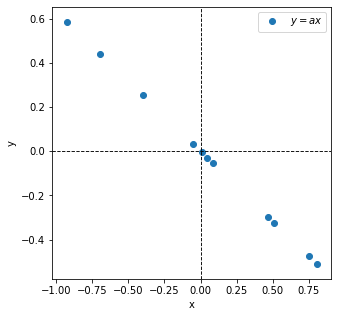

In [2]:
x = np.random.uniform(-1, 1, 11)
y = a*x

scatter(x, y, label='$y = ax$')

And let's add some noise on the y axis:

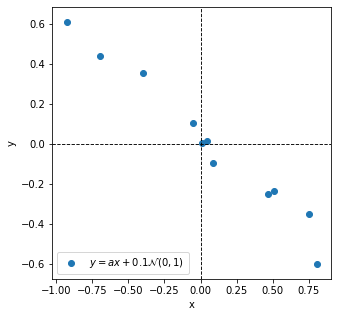

In [3]:
y = a*x + 0.1*np.random.randn(11)

scatter(x, y, label='$y = ax + 0.1\mathcal{N}(0,1)$')

Now let's guess a random slope:

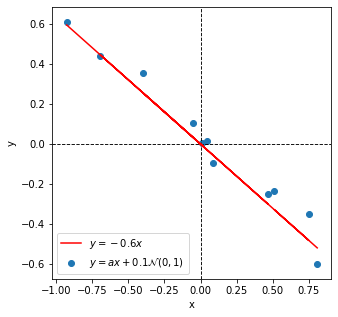

In [4]:
a_ = np.random.randn()

y_ = a_*x

def scatter_and_line(x, y, y_, label_scatter, label_line):
    fig, ax = init_plot()
    ax.scatter(x, y, label=label_scatter)
    ax.plot(x, y_, color='red', label=label_line)
    plt.legend()
    plt.show()
    
scatter_and_line(x, y, y_,
    label_scatter='$y = ax + 0.1\mathcal{N}(0,1)$',
    label_line=f'$y = {a_:.1f}x$'
)

This line is possibly a very bad fit to the datapoints. To have an idea of how bad our guess was, we can compute a **loss function**.

For example, we can compute the **distance** between every datapoint and the line, measured (for example) in the vertical direction:

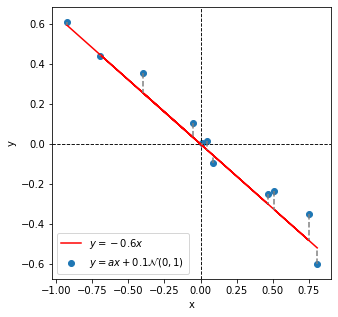

In [5]:
def scatter_line_and_dists(x, y, y_, label_scatter, label_line):
    fig, ax = init_plot()
    ax.scatter(x, y, label=label_scatter)
    ax.plot(x, y_, color='red', label=label_line)
    for i in range(len(x)):
        ax.plot([x[i], x[i]], [y[i], y_[i]], color='gray', ls='--')
    plt.legend()
    plt.show()
    
scatter_line_and_dists(x, y, y_,
    label_scatter='$y = ax + 0.1\mathcal{N}(0,1)$',
    label_line=f'$y = {a_:.1f}x$'
)

If we sum the absolute values of all distances we obtain a metric for the overall error of our estimation. But it's best to sum the **squares** of the distances because this will yield a **differentiable function** (more on why that's important later):

In [6]:
def loss_fn(y, y_):
    return sum((y_ - y)**2)

print(f'loss(y, y\') = {loss_fn(y, y_)}')

loss(y, y') = 0.05350093442926354


Naturally, different values of $a'$ will yield different losses. Our goal is to find the value for $a'$ which minimizes the loss:

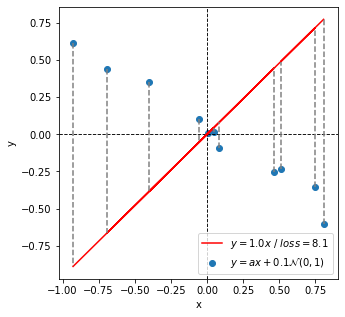

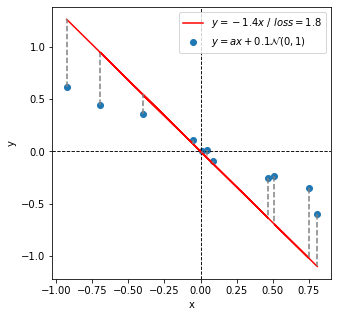

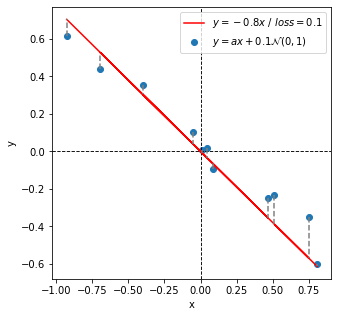

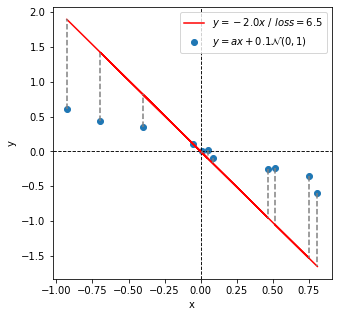

In [7]:
for i in range(4):
    a_ = np.random.randn()
    y_ = a_*x
    scatter_line_and_dists(x, y, y_,
        label_scatter='$y = ax + 0.1\mathcal{N}(0,1)$',
        label_line=f'$y = {a_:.1f}x$ / $loss = {loss_fn(y, y_):.1f}$'
    )

One simple way to visualize the effect of the **parameter** $a'$ in the loss function is to plot one against the other:

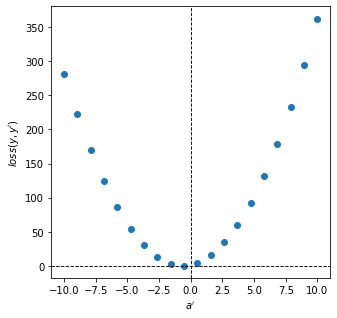

In [8]:
def a__vs_loss(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('$a\'$')
    ax.set_ylabel('$loss(y, y\')$')
    a_s = np.linspace(-10, 10, 20)
    losses = [loss_fn(y, a_*x) for a_ in a_s]
    ax.scatter(a_s, losses)
    plt.show()
    
a__vs_loss(x, y)

What we're doing here is we're **visualizing the loss as a function of our (sole) parameter y'**.

The loss function is a **parabola** because it's defined as the sum of **squared** differences (that is, $\sum_{i} (a'x_i - y_i)^2$).

Note that for our purposes, all $x_i$ and $y_i$ are **constants**. The only parameter under consideration is $a'$, and the expression is quadratic on it:

$\sum_i a'^2 x_i^2 - 2 a' x_i y_i + y_i^2$

If you remember your calculus, you know that you can find the minima / maxima of a function where the slope (derivative) is $=0$:

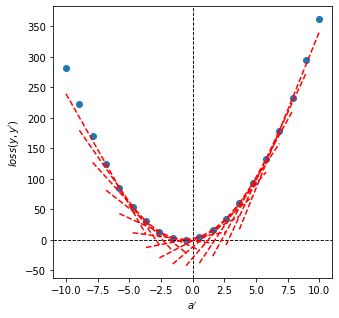

In [9]:
def a__vs_loss_with_derivative(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('$a\'$')
    ax.set_ylabel('$loss(y, y\')$')
    a_s = np.linspace(-10, 10, 20)
    losses = [loss_fn(y, a_*x) for a_ in a_s]
    ax.scatter(a_s, losses)
    for i in range(3, len(a_s)-3):
        slope = (losses[i+1] - losses[i])/(a_s[i+1] - a_s[i])
        intercept = losses[i] - slope*a_s[i]
        ax.plot(
            [a_s[i-3], a_s[i+3]],
            [intercept + slope*a_s[i-3], intercept + slope*a_s[i+3]],
            color='red',
            ls='--'
        )
    plt.show()
    
a__vs_loss_with_derivative(x, y)

Because (only in this case) the loss function is very simple, we can actually find the point of zero derivative analytically **by hand**:

$\frac{\partial}{\partial a'} \sum_i a'^2 x_i^2 - 2 a' x_i y_i + y_i^2 = \sum_i 2a' x_i^2 - 2 x_i y_i = 2a' \sum_i x_i^2 - 2 \sum_i x_i y_i$

1. $2a' \sum_i x_i^2 - 2 \sum_i x_i y_i = 0$
2. $a' \sum_i x_i^2 = \sum_i x_i y_i$
3. $a' = \frac{\sum_i x_i y_i}{\sum_i x_i^2}$

But on practical deep learning scenarios the loss function will be huge. So it's very useful to compute the derivatives with an algorithm.

You can do that with

![](https://images.exxactcorp.com/CMS/landing-page/resource-center/supported-software/deep-learning/pytorch/PyTorch-logo.jpg)

![](https://camo.githubusercontent.com/37a83e8eca1db15cf70475cc6bdd4880b1f7b04d/68747470733a2f2f7777772e74656e736f72666c6f772e6f72672f696d616765732f74665f6c6f676f5f686f72697a6f6e74616c2e706e67)

![](https://fluxml.ai/logo.png)

In [10]:
import torch

def model(x, a_):
    return a_*x

# we need to convert numpy arrays to torch tensors
x = torch.tensor(x).float()
y = torch.tensor(y).float()

a_opt, deriv_opt = None, None
for a_ in np.linspace(-10, 10, 30):
    a_ = torch.tensor(a_, requires_grad=True).float()
    y_ = model(x, a_)
    loss = loss_fn(y, y_)
    loss.backward() # <--- this computes derivatives
    
    deriv = a_.grad.detach().numpy() # <--- derivatives can be acessed with ".grad"
    a_ = a_.detach().numpy()
    
    print(f'a\'={a_:.1f} | ∂loss/∂a\'={deriv:.1f}')
    
    # Let's look for the derivative closest to zero
    # i.e. to the most horizontal slope
    if not a_opt or abs(deriv - 0) < abs(deriv_opt - 0):
        a_opt = a_
        deriv_opt = deriv
        
print(f'Optimum a\' is ={a_opt}')

a'=-10.0 | ∂loss/∂a'=-60.1
a'=-9.3 | ∂loss/∂a'=-55.7
a'=-8.6 | ∂loss/∂a'=-51.3
a'=-7.9 | ∂loss/∂a'=-46.9
a'=-7.2 | ∂loss/∂a'=-42.4
a'=-6.6 | ∂loss/∂a'=-38.0
a'=-5.9 | ∂loss/∂a'=-33.6
a'=-5.2 | ∂loss/∂a'=-29.2
a'=-4.5 | ∂loss/∂a'=-24.7
a'=-3.8 | ∂loss/∂a'=-20.3
a'=-3.1 | ∂loss/∂a'=-15.9
a'=-2.4 | ∂loss/∂a'=-11.5
a'=-1.7 | ∂loss/∂a'=-7.0
a'=-1.0 | ∂loss/∂a'=-2.6
a'=-0.3 | ∂loss/∂a'=1.8
a'=0.3 | ∂loss/∂a'=6.2
a'=1.0 | ∂loss/∂a'=10.7
a'=1.7 | ∂loss/∂a'=15.1
a'=2.4 | ∂loss/∂a'=19.5
a'=3.1 | ∂loss/∂a'=23.9
a'=3.8 | ∂loss/∂a'=28.4
a'=4.5 | ∂loss/∂a'=32.8
a'=5.2 | ∂loss/∂a'=37.2
a'=5.9 | ∂loss/∂a'=41.7
a'=6.6 | ∂loss/∂a'=46.1
a'=7.2 | ∂loss/∂a'=50.5
a'=7.9 | ∂loss/∂a'=54.9
a'=8.6 | ∂loss/∂a'=59.4
a'=9.3 | ∂loss/∂a'=63.8
a'=10.0 | ∂loss/∂a'=68.2
Optimum a' is =-0.3448275923728943


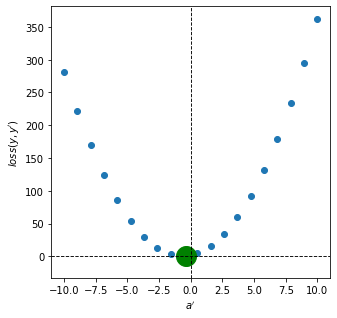

In [11]:
x = x.detach().numpy()
y = y.detach().numpy()

def a__vs_loss_with_opt(x, y, a_opt):
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.axvline(0, color='black', ls='--', lw=.9)
    ax.axhline(0, color='black', ls='--', lw=.9)
    ax.set_xlabel('$a\'$')
    ax.set_ylabel('$loss(y, y\')$')
    a_s = np.linspace(-10, 10, 20)
    losses = [loss_fn(y, a_*x) for a_ in a_s]
    ax.scatter(a_s, losses)
    
    y_ = model(x, a_opt)
    ax.scatter([a_opt], [loss_fn(y, y_)], color='green', s=400)
    plt.show()
    
a__vs_loss_with_opt(x, y, a_opt)